In [12]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
import rtmtools.lblrtm.aeranalyse as aeranalyse
import rtmtools.lblrtm.visualisation as viz

import rtmtools.clirad.sw.wrangle as cliradwrangle
import rtmtools.clirad.sw.analyse as cliradanalyse
import rtmtools.clirad.lw.info

import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
import rtmtools.rrtmg.sw.analyse as rrtmganalyse



importlib.reload(aerutils)
importlib.reload(aeranalyse)
importlib.reload(viz)

importlib.reload(cliradwrangle)
importlib.reload(cliradanalyse)
importlib.reload(rtmtools.clirad.lw.info)

importlib.reload(rrtmgwrangle)
importlib.reload(rrtmganalyse)

<module 'rtmtools.rrtmg.sw.analyse' from '/nuwa_cluster/home/jackyu/radiation/rtmtools/rtmtools/rrtmg/sw/analyse.py'>

#### Load CRD results

In [11]:
# Get lbl line-by-line results
pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_h2O_cut25/OUTPUT_RADSUM'
pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, cooling_rate = True, signed_fluxes = True)

outrad = aeranalyse.sum_OUTPUT_RADSUM_over_wbands(pnl_crd, V1 = 0, V2 = 3000)
cor_lbl = outrad.ix[outrad.index[1:], 'cooling_rate']
pres_lbl = .5 * (outrad.values[1:, 0] + outrad.values[:-1, 0])

In [13]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H1996_H2O_cut10/OUTPUT_RADSUM'
pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd1, cooling_rate = True, signed_fluxes = True)

df_crd1 = aeranalyse.sum_OUTPUT_RADSUM_over_wbands(pnl_crd1, V1 = 0, V2 = 3000)
pres_crd1 = .5 * (df_crd1.values[1:, 0] + df_crd1.values[: -1, 0])
cor_crd1 = df_crd1.ix[df_crd1.index[1:], 'cooling_rate']

#### Load CLIRAD results

In [14]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = '/nuwa_cluster/home/jackyu/radiation/clirad/LW/examples/mls75_H2O/OUTPUT_CLIRAD.dat'
pnl_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom = pathout_clirad, cooling_rate = True, signed_fluxes= True)

df_clirad = cliradanalyse.sum_OUTPUT_CLIRAD_over_wbands(pnl_clirad, wbands=range(1, 11))
pres_clirad = .5 * (df_clirad.values[: -1, 0] + df_clirad.values[1:, 0])
cor_clirad = df_clirad.values[1:, -1]

In [15]:
# prepare results Hitran 2012 updated version
def path_cliradlw_h2012():
    return '../clirad/LW/examples/mls75_H2O_H2012/CLIRAD_IR_output.dat'


def get_rateT(df, ratename = 'cooling rates'):
    return pd.DataFrame({'pressure': .5 * (df['p'].values[1:] + df['p'].values[: -1]),
                    ratename: df[ratename].values[1:]})


df = cliradwrangle.output_txtfile_to_DataFrame(path_cliradlw_h2012())

rateT_clirad2012 = get_rateT(df, ratename = 'cooling rates')

#### Load LBLRTM results

In [16]:
# Get AER line-by-line results
pathout_lblrtm = '/nuwa_cluster/home/jackyu/line_by_line/aerlbl_v12.2_package/runs/LW/run_mls75pro_H2O/OUTPUT_RADSUM'
pnl_lblrtm = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_lblrtm, signed_fluxes = True, cooling_rate = True)


outrad = aeranalyse.sum_OUTPUT_RADSUM_over_wbands(pnl_lblrtm, V1 = 0, V2 = 3000)
cor_lblrtm = outrad.ix[outrad.index[1:], 'cooling_rate']
pres_lblrtm = .5 * (outrad.values[1:, 0] + outrad.values[:-1, 0])

#### Load RRTMG results

In [17]:
pathout_rrtmg = '/nuwa_cluster/home/jackyu/radiation/rrtmg/LW/examples/mls70_H2O/OUTPUT_RRTM'
pnl_rrtmg = rrtmgwrangle.OUTPUT_RRTM_to_pandasPanel(readfrom = pathout_rrtmg, signed_fluxes = True, cooling_rate = True)


outrad = aeranalyse.sum_OUTPUT_RADSUM_over_wbands(pnl_rrtmg, V1 = 0, V2 = 3000)
cor_rrtmg = outrad.ix[outrad.index[1:], 'cooling_rate']
pres_rrtmg = .5 * (outrad.values[1:, 0] + outrad.values[:-1, 0])

In [22]:
pnl_rrtmg.items

MultiIndex(levels=[[10.0, 350.0, 500.0, 630.0, 700.0, 820.0, 980.0, 1080.0, 1180.0, 1390.0, 1480.0, 1800.0, 2080.0, 2250.0, 2380.0, 2600.0], [350.0, 500.0, 630.0, 700.0, 820.0, 980.0, 1080.0, 1180.0, 1390.0, 1480.0, 1800.0, 2080.0, 2250.0, 2380.0, 2600.0, 3250.0]],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]])

#### Plot cooling rates

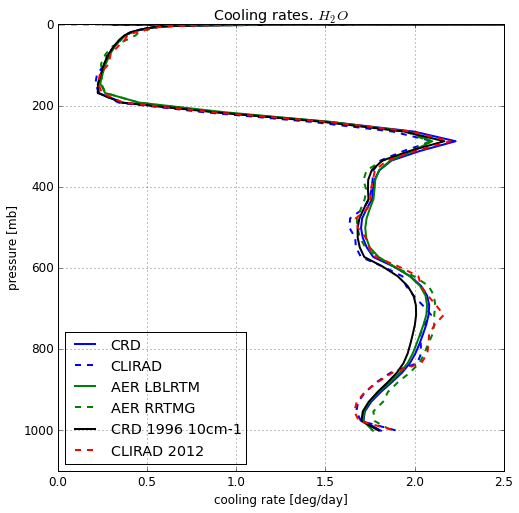

In [71]:
matplotlib.rcParams.update({'font.size': 12.})
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111,\
                     xlabel = 'cooling rate [deg/day]', xlim = [0, 2.5],
                     ylabel = 'pressure [mb]', ylim = [1e-4, 1.1e3],
                     title = 'Cooling rates. $H_2O$')

#items = [ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()
#[item.set_fontsize(20) for item in items]

lines = ax.plot(cor_lbl, pres_lbl, \
                    cor_clirad, pres_clirad,
                    cor_lblrtm, pres_lblrtm,
                    cor_rrtmg, pres_rrtmg,
                    cor_crd1, pres_crd1,
                    rateT_clirad2012['cooling rates'], rateT_clirad2012['pressure'],)

ax.set_yscale('linear')

plt.grid(b = True)
plt.gca().invert_yaxis()

colours = ['b'] * 2 + ['g'] * 2 + ['k'] + ['r']
linestyles = ['-', '--', '-', '--', '-', '--']
[plt.setp(line, color = colour, linestyle = linestyle, linewidth = 2.) \
 for line, colour, linestyle in zip(lines, colours, linestyles) ]

plt.legend(['CRD', 'CLIRAD', 
            'AER LBLRTM', 'AER RRTMG', 
            'CRD 1996 10cm-1',
           'CLIRAD 2012'], loc = 'best')


#plt.savefig('cor_mls_H2O_lineary.png')

In [10]:
pnl_rrtmg.shape

NameError: name 'pnl_rrtmg' is not defined

# In RRTMG's wavenumber bands

In [18]:
levels =  [70, 30, 0]
attrs = ['pressure', 'flux_up', 'flux_down', 'net_flux', 'cooling_rate']
name_molecule = '$H_2O$'

In [27]:
crd_wrt_rrtmg = aeranalyse.lines2bands(pnl_crd, wbands = pnl_rrtmg.items)
crd_wrt_rrtmg_lvls = crd_wrt_rrtmg.ix[:, levels, :]

In [86]:
lblrtm_wrt_rrtmg = aeranalyse.lines2bands(pnl_lblrtm, wbands = pnl_rrtmg.items)
lblrtm_wrt_rrtmg_lvls = lblrtm_wrt_rrtmg.ix[:, levels, :]

In [54]:
rrtmg_wrt_rrtmg = pnl_rrtmg.ix[:, :, attrs]
rrtmg_wrt_rrtmg_lvls = rrtmg_wrt_rrtmg.ix[:, levels, :]

In [51]:


def flux_tables_by_rrtmg_bands(pnl_rrtmg, *names_pnls_lbl):
    
    atm_levels = [70, 30, 0]
    
    names, pnls_lbl = map(list, zip(*names_pnls_lbl))
    
    lbl_pnls_by_rrtmg_bands = [aeranalyse.lines2bands(pnl_lbl, wbands = pnl_rrtmg.items) \
                               for pnl_lbl in pnls_lbl]
    
    names.append('RRTMG')
    
    for item in pnl_rrtmg.items:
        print('---------------------------------------------------------------------------')
        print() 
        dfs = [pnl[item].loc[atm_levels, :] for pnl in lbl_pnls_by_rrtmg_bands]
        dfs.append(pnl_rrtmg[item].loc[atm_levels, :])
        
        viz.tabulate_difference(dfs = dfs, 
                                names = names,
                                title = 'RRTMG Wavenumber band: {} ~ {} cm-1'.format(*item))
        
        
        
        
        
        
def flux_plots_by_rrtmg_bands(pnl_rrtmg, *infos_lbl):
    
    atm_levels = [70, 30, 0]
    
    names, colours, linestyles, pnls_lbl = zip(infos_lbl)
        
    names.append('RRTMG')
    colours.append('g')
    linestyles.append('--')
    
    lbl_pnls_by_rrtmg_bands = (aeranalyse.lines2bands(pnl_lbl, wbands = pnl_rrtmg.items.values)\
                              for pnl_lbl in pnls_lbl)
    
    for item in pnl_rrtmg.items:
        dfs = [pnl[item] for pnl in lbl_pnls_by_rrtmg_bands]
        dfs.append(pnl_rrtmg[item])
        viz.plot_pres_vs_hrcr(dfs = dfs,
                              names = names,
                              linestyles = ['-', '-', '--'], 
                              colours = ['b', 'g', 'g'],
                              title = 'Cooling rate {} {} ~ {} cm-1'.format(name_molecule, *item),
                              cooling_rate = True)
    
        display.display(plt.gcf()); plt.close()
    


In [52]:
print('Flux tables in RRTMG spectral bands')
print()
print()

flux_tables_by_rrtmg_bands(pnl_rrtmg, ('CRD', pnl_crd), ('LBLRTM', pnl_lblrtm))
    

Flux tables in RRTMG spectral bands


---------------------------------------------------------------------------


RRTMG Wavenumber band: 10.0 ~ 350.0 cm-1

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -36.618217   0.000000 -36.618217      0.000000
30   299.800000 -38.842137  22.076937 -16.765200      1.442737
0   1013.000000 -54.573788  54.550693  -0.023095      0.008350

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.723339   0.000000 -36.723339      0.000000
30   299.8000 -38.985445  22.030611 -16.954833      1.334082
0   1013.0000 -54.581667  54.656241   0.074573      0.030404

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -36.3061     0.0000  -36.3061      -0.00000
30   299.70000 -38.7258    22.3568  -16.3690       1.36489
0   1013.00000 -54.5825    54.5778   -0.0047       0.00201

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017  0.105

# In CLIRAD's wavenumber bands

In [61]:
clirad_wbands = rtmtools.clirad.lw.info.wavenumber_bands()

In [75]:
levels = [70, 30, 0]
attrs = ['pressure', 'flux_up', 'flux_down', 'net_flux', 'cooling_rate']
name_molecule = '$H_2O$'
wbands = list(range(1, 10 + 1))
wranges = {wband: clirad_wbands[wband] for wband in wbands}

In [76]:
crd_wrt_clirad = rtmtools.clirad.sw.analyse.lines2bands(pnl_crd, wbands = wranges)
crd_wrt_clirad_lvls = crd_wrt_clirad.ix[:, levels, :]

In [94]:
lblrtm_wrt_clirad = rtmtools.clirad.sw.analyse.lines2bands(pnl_lblrtm, wbands = wranges)
lblrtm_wrt_clirad_lvls = lblrtm_wrt_clirad.ix[:, levels, :]

In [77]:
clirad_wrt_clirad = pnl_clirad.ix[:, :, attrs]
clirad_wrt_clirad_lvls = clirad_wrt_clirad.ix[:, levels, :]


Wavenumber range: bands 1 ~ 10, 0 ~ 340 340 ~ 540 540 ~ 800 800 ~ 980 980 ~ 1100 1100 ~ 1215 1215 ~ 1380 1380 ~ 1900 1900 ~ 3000 540 ~ 620 cm-1

CRD
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -330.364996    0.000000 -330.364996      0.000000
30   299.800000 -334.881101   30.899799 -303.981303      2.229884
0   1013.000000 -417.036573  269.788139 -147.248434      1.760886

LBLRTM
     pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.0024 -330.106812    0.000000 -330.106812      0.000000
30   299.8000 -334.721620   31.092175 -303.629445      2.098302
0   1013.0000 -416.917706  269.875954 -147.041752      1.738693

CLIRAD
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -330.867192    0.003142 -330.864050      1.548517
30   299.800000 -335.492487   29.573816 -305.918671      2.102073
0   1013.000000 -417.111670  265.030409 -152.081261      1.843070

CRD - LBLRTM
    pressure   flux_up  flux_down  n

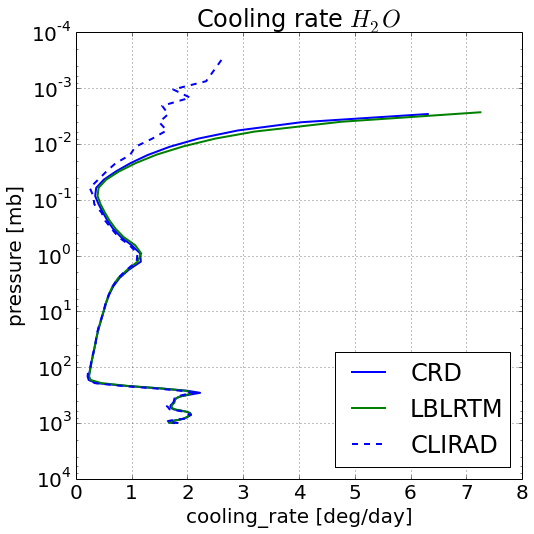


--------------------------------------------------------------------


Wavenumber band: 1, 0 ~ 340 cm-1

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -34.310935   0.000000 -34.310935      0.000000
30   299.800000 -36.441826  21.391389 -15.050438      1.376942
0   1013.000000 -51.093040  51.071508  -0.021532      0.007733

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -34.414209   0.000000 -34.414209      0.000000
30   299.8000 -36.581592  21.327248 -15.254344      1.271039
0   1013.0000 -51.100657  51.173323   0.072666      0.029632

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -34.37159   0.002874 -34.368716      1.577515
30   299.800000 -36.61385  20.503710 -16.110140      1.298307
0   1013.000000 -51.09215  51.070810  -0.021340      0.007712

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017  0.103275   0.000000  0.103275      0.000000


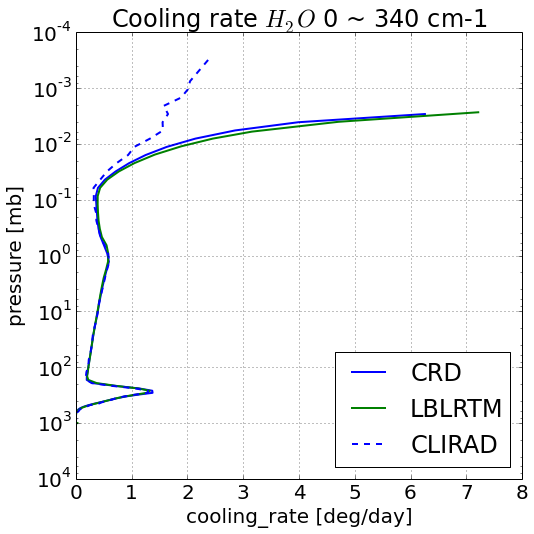


--------------------------------------------------------------------


Wavenumber band: 2, 340 ~ 540 cm-1

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.541409   0.000000 -60.541409      0.000000
30   299.800000 -61.600467   6.651864 -54.948602      0.644241
0   1013.000000 -82.315835  81.330012  -0.985823      0.130917

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.328425   0.000000 -60.328425      0.000000
30   299.8000 -61.423870   6.869068 -54.554802      0.627782
0   1013.0000 -82.315849  81.374680  -0.941169      0.139025

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.48252   0.000202 -60.482318      0.092795
30   299.800000 -61.57807   6.550384 -55.027686      0.621190
0   1013.000000 -82.31578  81.136740  -1.179040      0.186630

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017 -0.212984   0.000000 -0.212984      0.00000

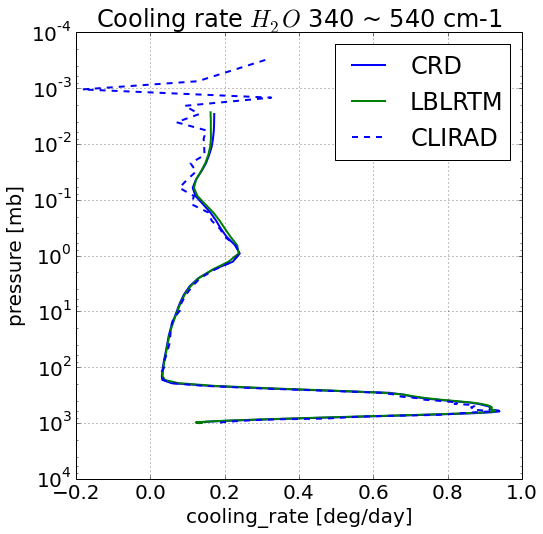


--------------------------------------------------------------------


Wavenumber band: 3, 540 ~ 800 cm-1

CRD
       pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -99.015291   0.000000 -99.015291      0.000000
30   299.800000  -99.263422   0.874413 -98.389009      0.094366
0   1013.000000 -112.837813  71.524950 -41.312864      0.940123

LBLRTM
     pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.0024  -98.880869   0.000000 -98.880869      0.000000
30   299.8000  -99.137563   0.900061 -98.237502      0.093321
0   1013.0000 -112.816764  71.677675 -41.139088      0.915718

CLIRAD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -99.41675   0.000004 -99.416746     -0.000000
30   299.800000  -99.60644   0.550900 -99.055540      0.073303
0   1013.000000 -112.81600  67.304400 -45.511600      0.947221

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017 -0.134422   0.000000 -0.134422 

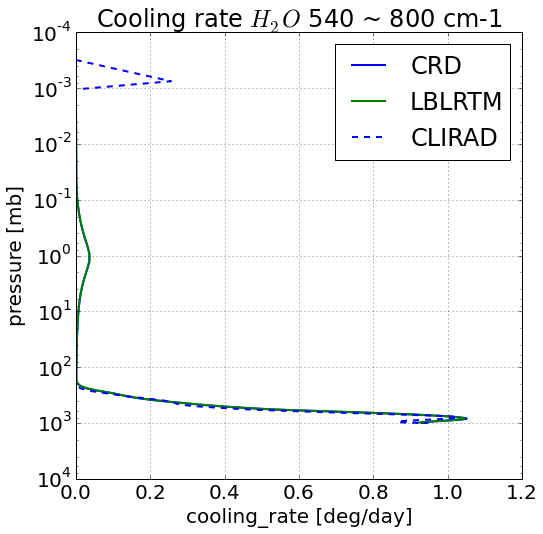


--------------------------------------------------------------------


Wavenumber band: 4, 800 ~ 980 cm-1

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.486170   0.000000 -60.486170      0.000000
30   299.800000 -60.493092   0.006507 -60.486585      0.000067
0   1013.000000 -61.681243   7.708875 -53.972367      0.222374

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.454948   0.000000 -60.454948      0.000000
30   299.8000 -60.461849   0.006193 -60.455657      0.000022
0   1013.0000 -61.657526   7.643344 -54.014182      0.210667

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.42977   0.000000 -60.429770     -0.000000
30   299.800000 -60.43380   0.003612 -60.430188     -0.000004
0   1013.000000 -61.64932   7.254220 -54.395100      0.196068

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017 -0.031222   0.000000 -0.031222      0.00000

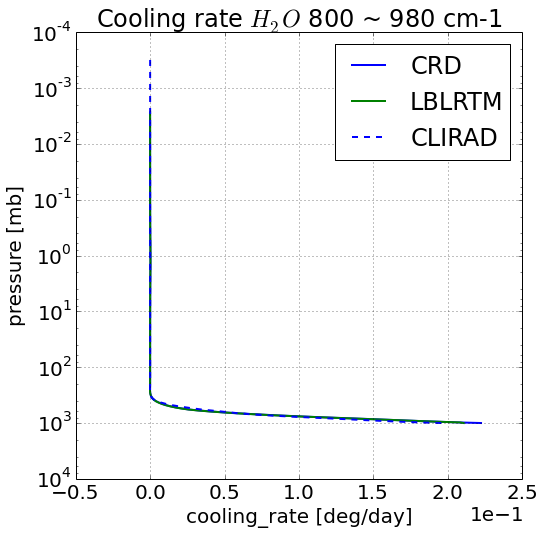


--------------------------------------------------------------------


Wavenumber band: 5, 980 ~ 1100 cm-1

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -30.905162   0.000000 -30.905162      0.000000
30   299.800000 -30.907243   0.001333 -30.905910     -0.000103
0   1013.000000 -31.354231   2.633614 -28.720617      0.085000

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.879242   0.000000 -30.879242      0.000000
30   299.8000 -30.881315   0.001280 -30.880035     -0.000105
0   1013.0000 -31.337711   2.634985 -28.702725      0.080500

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -30.95973   0.000000 -30.959730     -0.000000
30   299.800000 -30.96045   0.000354 -30.960096     -0.000066
0   1013.000000 -31.34392   2.454610 -28.889310      0.079591

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017 -0.025920   0.000000 -0.025920      0.0000

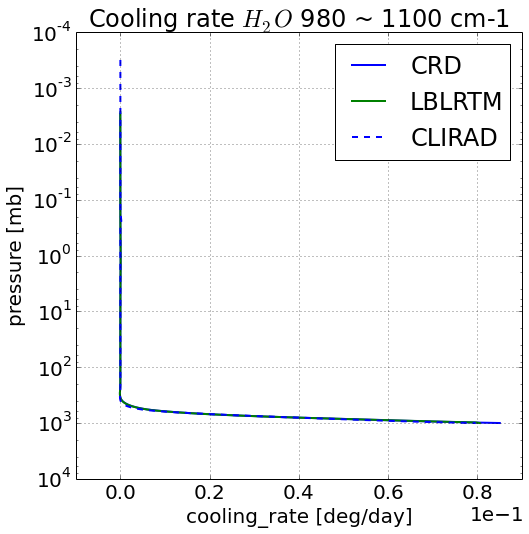


--------------------------------------------------------------------


Wavenumber band: 6, 1100 ~ 1215 cm-1

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.773071   0.000000 -21.773071      0.000000
30   299.800000 -21.785504   0.012772 -21.772732      0.000306
0   1013.000000 -23.269652   6.305412 -16.964240      0.160466

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -21.757789   0.000000 -21.757789      0.000000
30   299.8000 -21.770345   0.012577 -21.757768      0.000266
0   1013.0000 -23.254791   6.298861 -16.955930      0.156404

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.77967   0.000000 -21.779670     -0.000000
30   299.800000 -21.78891   0.007709 -21.781201     -0.000048
0   1013.000000 -23.27341   6.345939 -16.927471      0.157669

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017 -0.015281   0.000000 -0.015281      0.000

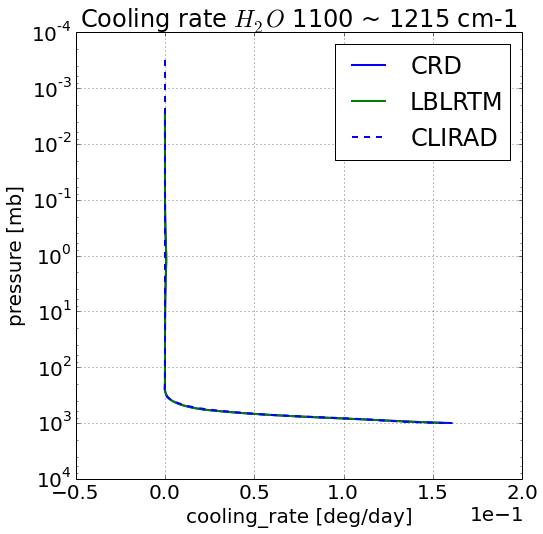


--------------------------------------------------------------------


Wavenumber band: 7, 1215 ~ 1380 cm-1

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -16.067263   0.000000 -16.067263      0.000000
30   299.800000 -16.197831   0.207324 -15.990508      0.012007
0   1013.000000 -23.755165  18.572777  -5.182388      0.187100

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -16.086567   0.000000 -16.086567      0.000000
30   299.8000 -16.218299   0.207811 -16.010487      0.011503
0   1013.0000 -23.736876  18.476167  -5.260709      0.187584

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -15.82403   0.000000 -15.824030     -0.000000
30   299.800000 -15.96999   0.229909 -15.740081      0.015910
0   1013.000000 -23.74062  18.792570  -4.948050      0.201911

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017  0.019304   0.000000  0.019304      0.000

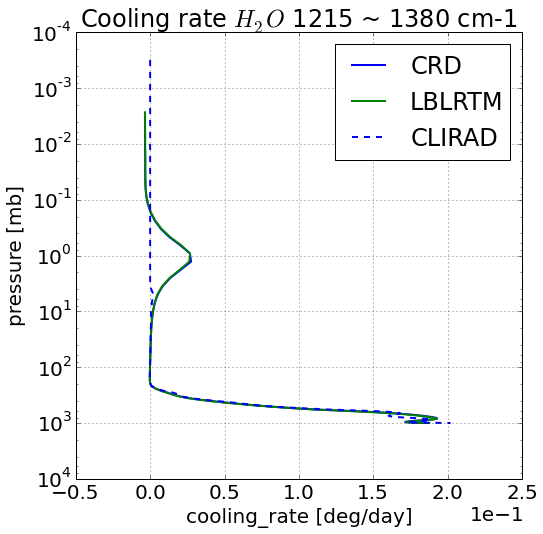


--------------------------------------------------------------------


Wavenumber band: 8, 1380 ~ 1900 cm-1

CRD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -7.265696   0.000000 -7.265696      0.000000
30   299.800000  -8.191717   1.754197 -6.437520      0.102059
0   1013.000000 -30.729595  30.640991 -0.088604      0.027174

LBLRTM
     pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.0024  -7.304761   0.000000 -7.304761      0.000000
30   299.8000  -8.246787   1.767938 -6.478849      0.094475
0   1013.0000 -30.697533  30.596919 -0.100614      0.019163

CLIRAD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -7.603132   0.000061 -7.603071     -0.121793
30   299.800000  -8.540977   1.727239 -6.813738      0.093480
0   1013.000000 -30.880470  30.671120 -0.209350      0.066269

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017  0.039066   0.000000  0.039066      0.000000
30  

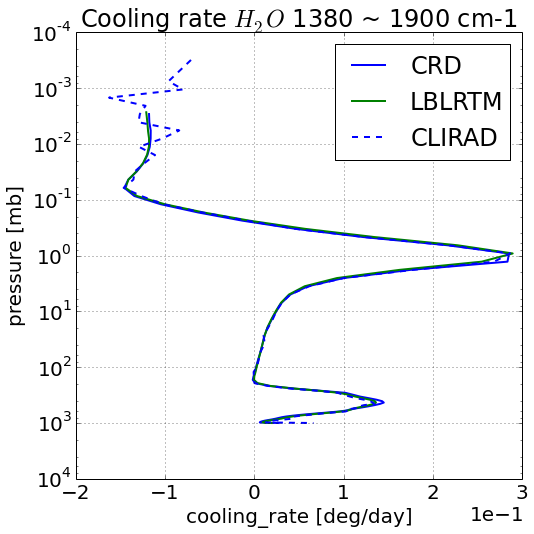


--------------------------------------------------------------------


Wavenumber band: 9, 1900 ~ 3000 cm-1

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -5.120375   0.000000 -5.120375      0.000000
30   299.800000 -5.134693   0.013024 -5.121669     -0.000221
0   1013.000000 -6.625445   3.073782 -3.551663      0.050266

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -5.069402   0.000000 -5.069402      0.000000
30   299.8000 -5.083684   0.013152 -5.070533     -0.000185
0   1013.0000 -6.614782   3.026062 -3.588721      0.027784

CLIRAD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -5.000064 -1.536682e-08 -5.000064     -0.000000
30   299.800000 -5.012225  1.126136e-02 -5.000964     -0.000082
0   1013.000000 -6.674494  3.173176e+00 -3.501318      0.056628

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017 -0.050973   0.000000 -0.050973      0.000000
30  

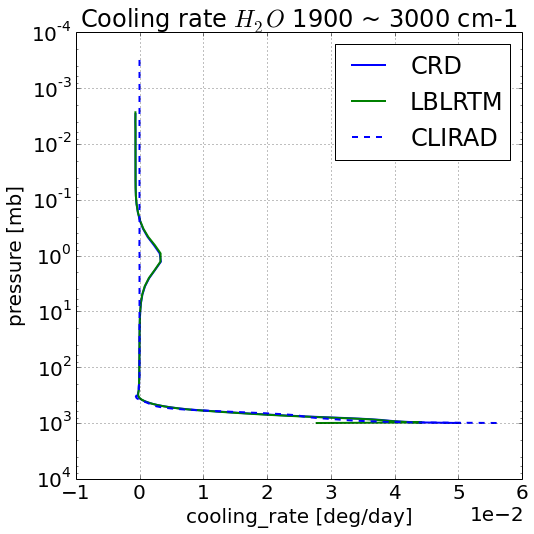


--------------------------------------------------------------------


Wavenumber band: 10, 540 ~ 620 cm-1

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -29.563330   0.000000 -29.563330      0.000000
30   299.800000 -29.715745   0.607149 -29.108595      0.064925
0   1013.000000 -36.235420  32.287543  -3.947877      0.266056

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -29.456983   0.000000 -29.456983      0.000000
30   299.8000 -29.616186   0.631945 -28.984241      0.064959
0   1013.0000 -36.231410  32.412175  -3.819235      0.256118

CLIRAD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   299.800000       -0          0         0            -0
0   1013.000000       -0          0         0            -0

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000017 -0.106347   0.000000 -0.106347      0.000000
30  0

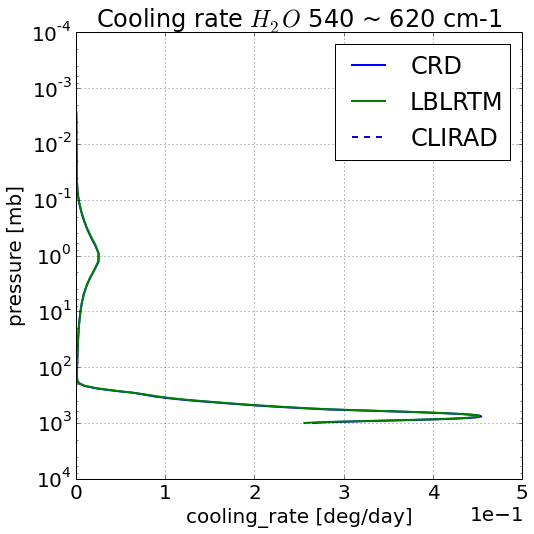


--------------------------------------------------------------------



In [101]:
df_crd = cliradanalyse.sum_OUTPUT_CLIRAD_over_wbands(crd_wrt_clirad, 
                                                     wbands = range(1, 8 + 1))
df_lblrtm = cliradanalyse.sum_OUTPUT_CLIRAD_over_wbands(lblrtm_wrt_clirad, 
                                                        wbands = range(1, 8 + 1))
df_clirad = cliradanalyse.sum_OUTPUT_CLIRAD_over_wbands(clirad_wrt_clirad, 
                                                        wbands = range(1, 8 + 1))

df_crd_lvls = df_crd.ix[levels, :]
df_lblrtm_lvls = df_lblrtm.ix[levels, :]
df_clirad_lvls = df_clirad.ix[levels, :]

wlabel = ' '.join(['{} ~ {}'.format(*interval) \
                   for key, intervals in wranges.items() \
                   for interval in intervals]) + ' cm-1'

viz.tabulate_difference(dfs = [df_crd_lvls, df_lblrtm_lvls, df_clirad_lvls], 
                        names = ['CRD', 'LBLRTM', 'CLIRAD'],
                        title = 'Wavenumber range: bands {} ~ {}, {}'.\
                        format(wbands[0], wbands[-1], wlabel))

viz.plot_pres_vs_hrcr(dfs = [df_crd, df_lblrtm, df_clirad],
                      names = ['CRD', 'LBLRTM', 'CLIRAD'],
                      linestyles = ['-', '-', '--'],
                      colours = ['b', 'g', 'b'],
                      title = 'Cooling rate {}'.format(name_molecule),
                      cooling_rate = True)

display.display(plt.gcf()); plt.close()

print()
print('--------------------------------------------------------------------')
print()


for wband in wbands:
    df_crd_lvls = crd_wrt_clirad_lvls[wband]
    df_lblrtm_lvls = lblrtm_wrt_clirad_lvls[wband]
    df_clirad_lvls = clirad_wrt_clirad_lvls[wband]
    
    df_crd = crd_wrt_clirad[wband]
    df_lblrtm = lblrtm_wrt_clirad[wband]
    df_clirad = clirad_wrt_clirad[wband]
    
    wlabel = ' '.join(['{} ~ {}'.format(*interval) for interval in wranges[wband]]) + ' cm-1'
    
    viz.tabulate_difference(dfs = [df_crd_lvls, df_lblrtm_lvls, df_clirad_lvls], 
                            names = ['CRD', 'LBLRTM', 'CLIRAD'],
                            title = 'Wavenumber band: {}, {}'.format(wband, wlabel))

    viz.plot_pres_vs_hrcr(dfs = [df_crd, df_lblrtm, df_clirad],
                          names = ['CRD', 'LBLRTM', 'CLIRAD'],
                          linestyles = ['-', '-', '--'],
                          colours = ['b', 'g', 'b'],
                          title = 'Cooling rate {} {}'.format(name_molecule, wlabel),
                          cooling_rate = True)
    
    display.display(plt.gcf()); plt.close()
    
    print()
    print('--------------------------------------------------------------------')
    print()

In [66]:
display.HTML('''
<script>
show_code = true;
function code_toggle() {
if (show_code) {$('div.input').hide();} else {$('div.input').show();}
show_code = !show_code
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code"></form>
''')